Database Source: https://www.kaggle.com/datasets/arashnic/fitbit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sympy import symbols, Eq, solve

In [2]:
fit = pd.read_csv('dailyActivity_merged.csv')
fit

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [3]:
stats = fit.groupby(['Id'])
stats = stats.sum()
stats

/tmp/ipykernel_575/246961323.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stats = stats.sum()


,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,
1503960366,375619,242.099999,242.099999,0.000000,88.610000,24.620000,128.740000,0.00,1200,594,6818,26293,56309
1624580081,178061,121.360001,121.360001,0.000000,29.120000,11.180000,80.810000,0.19,269,180,4758,38990,45984
1644430081,218489,158.860001,158.860001,0.000000,21.900000,28.530000,108.270001,0.12,287,641,5354,34856,84339
1844505072,79982,52.890000,52.890000,0.000000,0.260000,1.520000,51.069999,0.00,4,40,3579,37405,48778
1927972279,28400,19.670000,19.670000,0.000000,2.970000,0.970000,15.720000,0.00,41,24,1196,40840,67357
2022484408,352490,250.609998,250.609998,0.000000,75.069999,22.320000,153.220000,0.00,1125,600,7981,34490,77809
2026352035,172573,107.100000,107.100000,0.000000,0.190000,0.350000,106.520000,0.00,3,8,7956,21372,47760
2320127002,146223,98.819999,98.819999,0.000000,3.310000,3.030000,92.390000,0.00,42,80,6144,37823,53449
2347167796,171354,114.400000,114.400000,0.000000,19.070000,19.350000,75.990001,0.00,243,370,4545,12369,36782


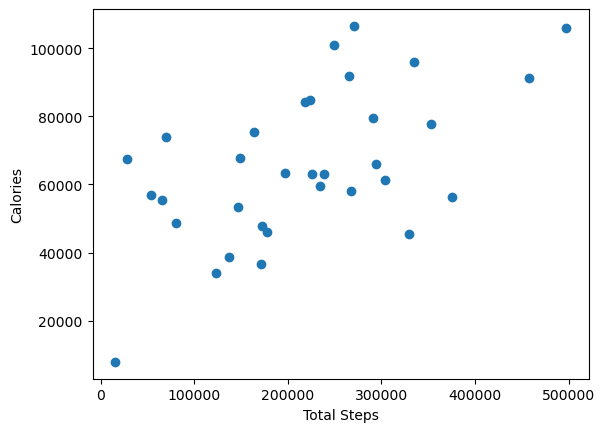

In [4]:
plt.scatter(stats['TotalSteps'], stats['Calories'])
plt.xlabel("Total Steps")
plt.ylabel("Calories")
plt.show()

In [5]:
def buildModel(source_data, dependent, independent):
    model = smf.ols(
        formula = dependent + '~' + independent, 
        data = source_data
    ).fit()

    display(model.summary())
    
    x = source_data[independent]
    y = source_data[dependent]
    beta0, beta1 = model.params

    plt.figure(figsize = (15, 8))
    plt.plot(x, y, 'ro')

    xticks = np.linspace(x.min(), x.max())
    plt.plot(xticks, beta0 + beta1 * xticks, lw = 5)

    plt.xlabel(independent)
    plt.ylabel(dependent)
    
    return model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     15.02
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           0.000515
Time:                        02:19:10   Log-Likelihood:                -370.17
No. Observations:                  33   AIC:                             744.3
Df Residuals:                      31   BIC:                             747.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.187e+04   6928.582      6.043      0.000    2.77e+04     5.6e+04
TotalSteps     0.1092      0.028      3.876      0.001       0.052       0.167
==============================================================================
Omnibus:                        0.909   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.791
Skew:                          -0.018   Prob(JB):                        0.673
Kurtosis:                       2.243   Cond. No.                     5.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

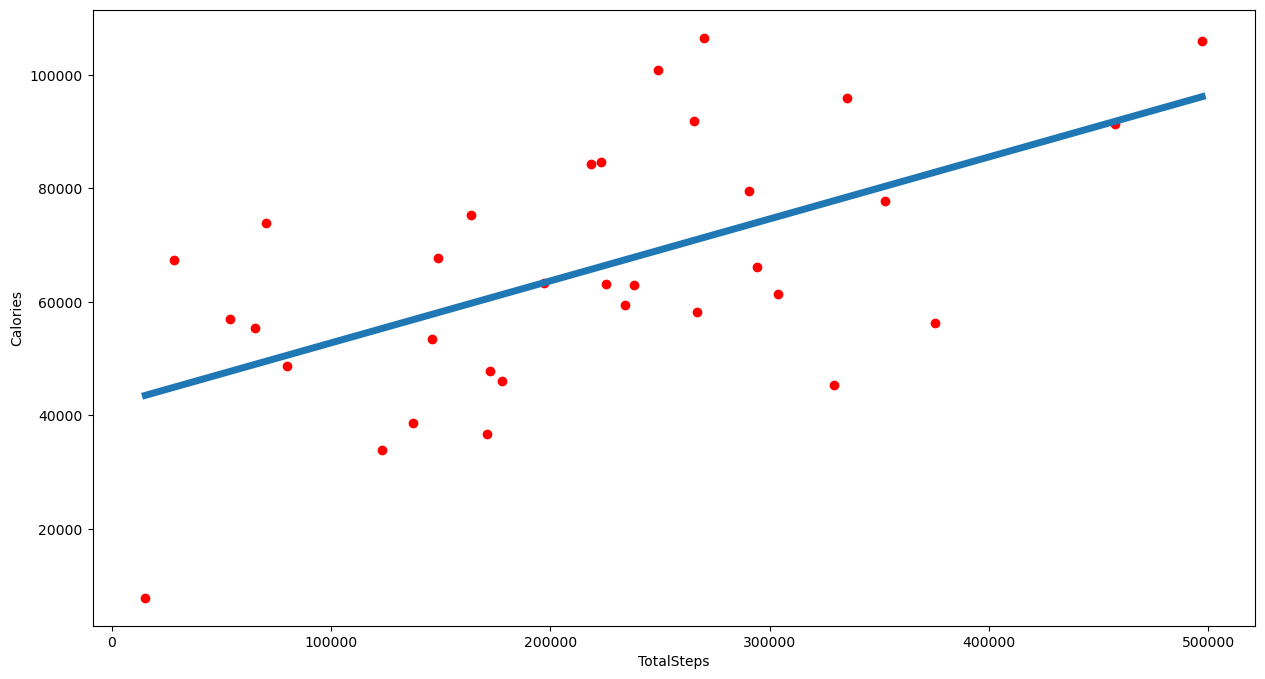

In [6]:
static_model = buildModel(stats, 'Calories', 'TotalSteps')

In [7]:
def takeSample(data, columns):
    sample_size = 10000
    
    data_sample = data[columns].sample(
        n = sample_size, replace = True, random_state = 3308
    )
    
    data_sample = data_sample.groupby(columns[0])
    data_sample = data_sample.sum()

    return data_sample

In [8]:
columns = ['Id', 'TotalSteps', 'Calories']
train_data = takeSample(fit, columns)
train_data

,TotalSteps,Calories
Id,,
1503960366,4011973,598487
1624580081,1743005,478741
1644430081,2426431,927570
1844505072,965567,539056
1927972279,309453,680611
2022484408,3729374,822350
2026352035,1926488,516044
2320127002,1622077,591522
2347167796,1541220,352543


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Calories   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     17.30
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           0.000234
Time:                        02:19:10   Log-Likelihood:                -448.23
No. Observations:                  33   AIC:                             900.5
Df Residuals:                      31   BIC:                             903.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.313e+05   7.32e+04      5.889      0.000    2.82e+05    5.81e+05
TotalSteps     0.1150      0.028      4.159      0.000       0.059       0.171
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.687
Skew:                           0.004   Prob(JB):                        0.709
Kurtosis:                       2.293   Cond. No.                     5.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

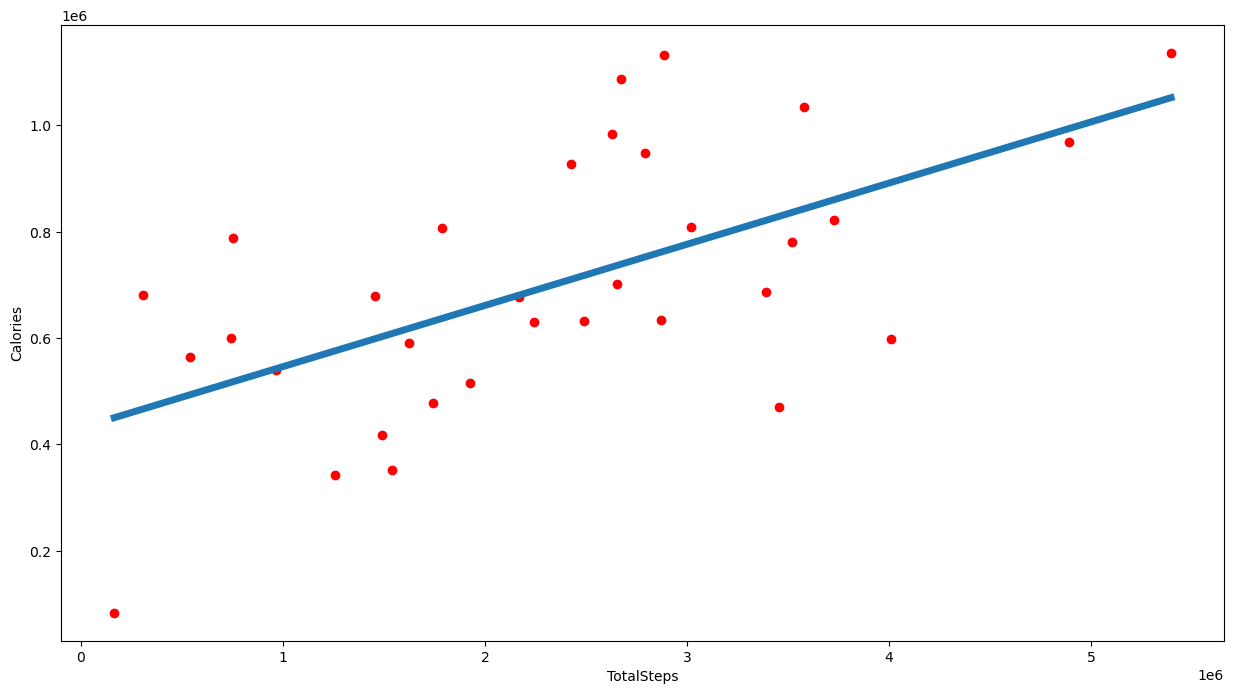

In [9]:
train_model = buildModel(train_data, 'Calories', 'TotalSteps')

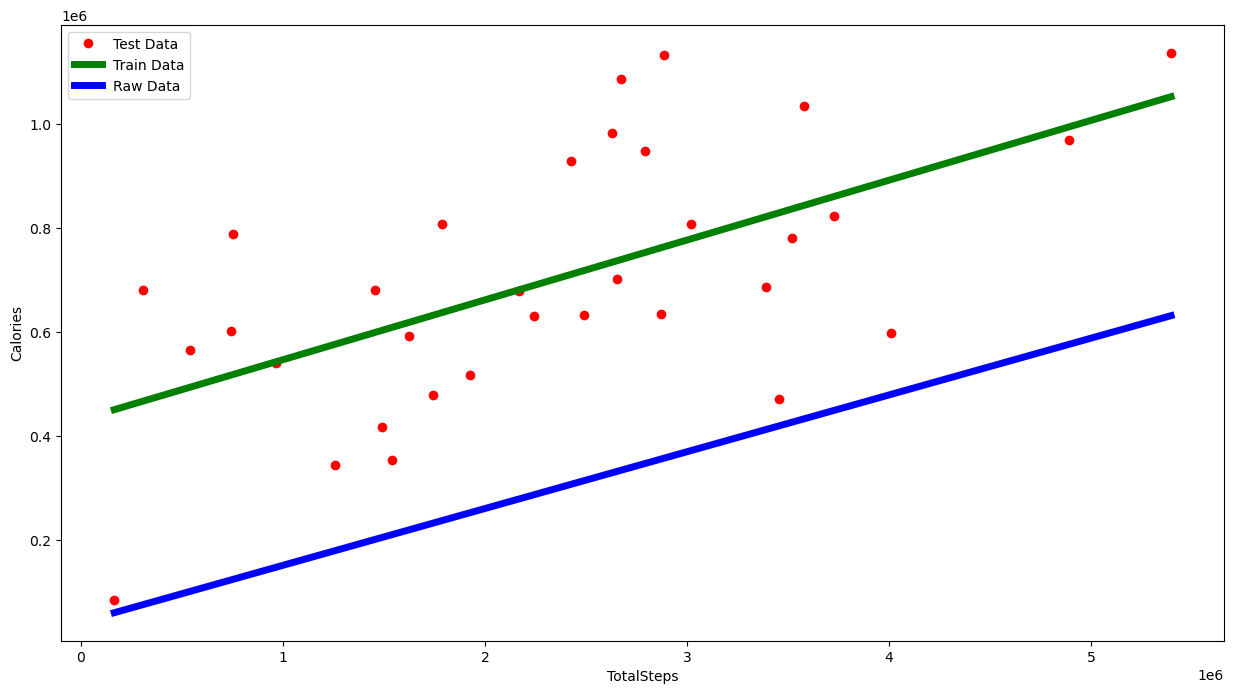

In [10]:
test_data = takeSample(fit, columns)

independent = columns[1]
dependent = columns[2]

x = test_data[independent]
y = test_data[dependent]

plt.figure(figsize = (15, 8))
plt.plot(x, y, 'ro', label = 'Test Data')

beta0, beta1 = train_model.params
xticks = np.linspace(x.min(), x.max())
plt.plot(xticks, beta0 + beta1 * xticks, 'g', lw = 5, label = 'Train Data')

beta0, beta1 = static_model.params
xticks = np.linspace(x.min(), x.max())
plt.plot(xticks, beta0 + beta1 * xticks, 'b', lw = 5, label = 'Raw Data')

plt.xlabel(independent)
plt.ylabel(dependent)
plt.legend()

In [11]:
def getFit(model):
    return model.params

In [12]:
def target(goal, model):
    x = symbols('x')
    y = goal
    beta0, beta1 = model.params

    equation = Eq(beta0 + beta1 * x, y)
    sol = solve(equation)[0]
    
    if sol < 0:
        return 0

    else:
        return sol

In [13]:
def getInput():
    try:
        goal = eval(input("How many calories do you wish to lose: "))
        
        if goal < 0:
            raise Exception()
            
        else:
            return goal

    except:
        print("You must enter a non-negative number\n")
        return getInput()

In [14]:
formula = getFit(train_model)
formula

Intercept     431262.449233
TotalSteps         0.115028
dtype: float64

In [15]:
goal = getInput()
stat_steps = target(goal, static_model)
train_steps = target(goal, train_model)

print('Static:', round(stat_steps), 'steps to burn', goal, 'calories')
print('Training:', round(train_steps), 'steps to burn', goal, 'calories')

How many calories do you wish to lose:  500000


Static: 4196662 steps to burn 500000 calories
Training: 597575 steps to burn 500000 calories


Formula: 

Calories = beta1 * StepsRun + Intercept 

In [16]:
def getCalories(reps, runningForm, exercise = None, bodyPart = None):
    if exercise == 'Running' or bodyPart == 'Cardio':
        beta0, beta1 = runningForm
        return beta0 + beta1 * reps
        
    elif exercise == 'Bicep Curl' or bodyPart == 'Arms':
        return 2 * reps
    
    elif exercise == 'Rows' or bodyPart == 'Back':
        return 3/2 * reps
    
    elif exercise == 'Squats' or bodyPart == 'Legs':
        return 5/2 * reps
    
    elif exercise == 'Sit-Ups' or bodyPart == 'Abs':
        return 3/5 * reps
    
    else:
        return 0

In [17]:
def getRepititions(calories, runningForm, exercise = None, bodyPart = None):
    if exercise == 'Running' or bodyPart == 'Cardio':
        beta0, beta1 = runningForm
        return (calories - beta0) / beta1
        
    elif exercise == 'Bicep Curl' or bodyPart == 'Arms':
        return 1/2 * calories
    
    elif exercise == 'Rows' or bodyPart == 'Back':
        return 2/3 * calories
    
    elif exercise == 'Squats' or bodyPart == 'Legs':
        return 2/5 * calories
    
    elif exercise == 'Sit-Ups' or bodyPart == 'Abs':
        return 5/3 * calories
    
    else:
        return 0

In [18]:
getCalories(15, formula, bodyPart = 'Arms')

30

In [19]:
getCalories(15, formula, 'Bicep Curl')

30

In [20]:
getCalories(15, formula, 'Sit-Ups')

9.0

In [21]:
getRepititions(12, formula, bodyPart = 'Abs')

20.0

In [22]:
getRepititions(500000, formula, 'Running', 'Cardio')

597574.5085852375